# 信号处理仿真与应用 - 数字和模拟滤波器 - 数字滤波

## fftfilt

#### GPU 上的重叠添加过滤

**和MATLAB波形一致**

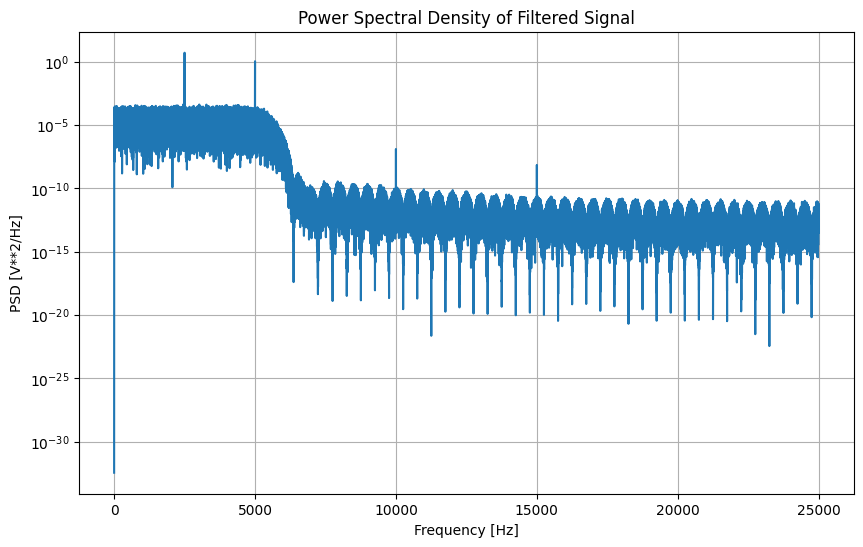

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, fftconvolve, periodogram
import cupy as cp  # 使用 CuPy 作为 GPU 加速库

# 设置采样参数
Fs = 50000  # 采样频率 50 kHz
t = np.arange(0, 10, 1/Fs)  # 时间向量

# 生成信号
x = (np.cos(2 * np.pi * 2500 * t) + 
     0.5 * np.sin(2 * np.pi * 5000 * t) + 
     0.25 * np.cos(2 * np.pi * 10000 * t) + 
     0.125 * np.sin(2 * np.pi * 15000 * t) + 
     np.random.randn(*t.shape))  # 加入白高斯噪声

# 设计低通 FIR 滤波器
numtaps = 101  # 滤波器阶数
cutoff = 5500  # 通带截止频率
B = firwin(numtaps, cutoff, fs=Fs, window="hamming")  # 使用 Hamming 窗

# 将数据和滤波器系数传输到 GPU
x_gpu = cp.asarray(x)
B_gpu = cp.asarray(B)

# 使用 FFT 进行滤波 (频域卷积)
y_gpu = cp.fft.ifft(cp.fft.fft(x_gpu) * cp.fft.fft(B_gpu, n=len(x_gpu)))
y = cp.asnumpy(y_gpu).real  # 将结果转换回 CPU 并取实部

# 绘制功率谱密度估计
f, Pxx_den = periodogram(y, Fs, window="rectangular", scaling='density')
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx_den)
plt.title('Power Spectral Density of Filtered Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid(True)
plt.show()


**采用文件调用**

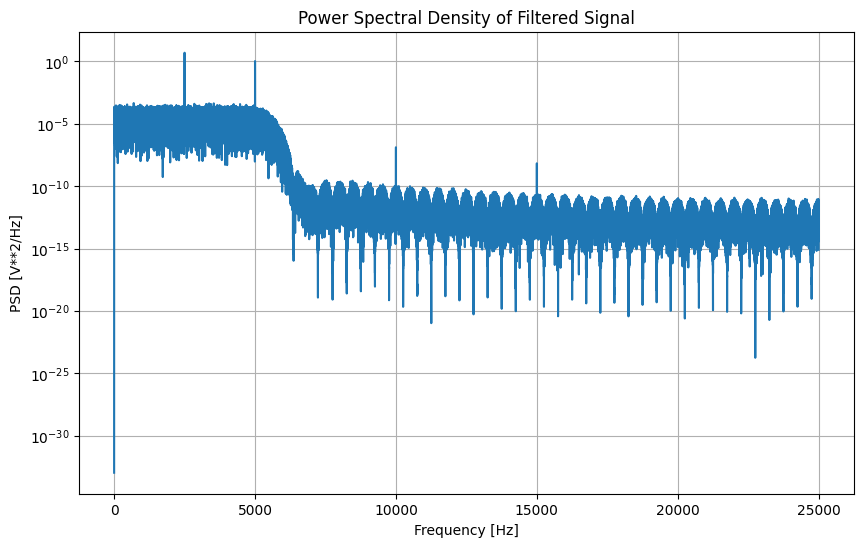

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, periodogram
from fftfilt import fftfilt  # 导入我们定义的 fftfilt 函数

# 设置采样参数
Fs = 50000  # 采样频率 50 kHz
t = np.arange(0, 10, 1/Fs)  # 时间向量，10秒长

# 生成信号
x = (np.cos(2 * np.pi * 2500 * t) + 
     0.5 * np.sin(2 * np.pi * 5000 * t) + 
     0.25 * np.cos(2 * np.pi * 10000 * t) + 
     0.125 * np.sin(2 * np.pi * 15000 * t) + 
     np.random.randn(*t.shape))  # 加入白高斯噪声

# 设计低通 FIR 滤波器
numtaps = 101  # 滤波器阶数
cutoff = 5500  # 通带截止频率
B = firwin(numtaps, cutoff, fs=Fs, window="hamming")  # 使用 Hamming 窗

# 使用 fftfilt 进行滤波
y = fftfilt(B, x)

# 绘制功率谱密度估计
f, Pxx_den = periodogram(y, Fs, window="rectangular", scaling='density')
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx_den)
plt.title('Power Spectral Density of Filtered Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid(True)
plt.show()
